# Using a Decision Tree Classifier to classify flowers into categories

## Step 1: Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Step 2: Import the dataset

In [2]:
dataset = pd.read_csv("Iris.csv")
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [3]:
print(dataset)
print(type(dataset))

      Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>


In [4]:
print(x)
print(type(x))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [5]:
print(y)
print(type(y))

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

## Step 3: Encode the categorical variable in y

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(y)

In [7]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Step 4: Split the dataset into training set and test set

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [9]:
print(x_train)

[[5.4 3.4 1.7 0.2]
 [5.  2.  3.5 1. ]
 [5.4 3.9 1.3 0.4]
 [5.6 2.8 4.9 2. ]
 [6.2 2.9 4.3 1.3]
 [4.9 3.  1.4 0.2]
 [6.4 3.2 5.3 2.3]
 [7.7 2.8 6.7 2. ]
 [6.4 2.8 5.6 2.1]
 [5.7 2.8 4.5 1.3]
 [5.6 2.9 3.6 1.3]
 [6.9 3.2 5.7 2.3]
 [6.6 2.9 4.6 1.3]
 [5.7 2.8 4.1 1.3]
 [6.5 2.8 4.6 1.5]
 [5.  3.2 1.2 0.2]
 [6.9 3.1 4.9 1.5]
 [6.3 3.4 5.6 2.4]
 [6.1 3.  4.9 1.8]
 [6.3 3.3 4.7 1.6]
 [6.5 3.2 5.1 2. ]
 [4.6 3.2 1.4 0.2]
 [6.7 2.5 5.8 1.8]
 [6.9 3.1 5.1 2.3]
 [5.6 3.  4.5 1.5]
 [5.6 2.7 4.2 1.3]
 [6.6 3.  4.4 1.4]
 [5.2 4.1 1.5 0.1]
 [5.1 3.4 1.5 0.2]
 [7.9 3.8 6.4 2. ]
 [4.8 3.1 1.6 0.2]
 [7.2 3.2 6.  1.8]
 [6.4 2.9 4.3 1.3]
 [7.7 2.6 6.9 2.3]
 [6.1 3.  4.6 1.4]
 [6.2 2.2 4.5 1.5]
 [6.7 3.  5.2 2.3]
 [5.5 2.6 4.4 1.2]
 [5.1 3.3 1.7 0.5]
 [6.5 3.  5.2 2. ]
 [6.7 3.  5.  1.7]
 [4.3 3.  1.1 0.1]
 [4.8 3.  1.4 0.3]
 [5.4 3.  4.5 1.5]
 [5.7 2.6 3.5 1. ]
 [4.6 3.1 1.5 0.2]
 [5.2 3.5 1.5 0.2]
 [4.6 3.6 1.  0.2]
 [6.  3.  4.8 1.8]
 [6.3 2.8 5.1 1.5]
 [6.7 3.1 4.4 1.4]
 [5.8 2.6 4.  1.2]
 [6.  2.7 5.

In [10]:
print(y_train)

[0 1 0 2 1 0 2 2 2 1 1 2 1 1 1 0 1 2 2 1 2 0 2 2 1 1 1 0 0 2 0 2 1 2 1 1 2
 1 0 2 1 0 0 1 1 0 0 0 2 2 1 1 1 1 0 0 0 0 1 0 2 0 2 2 0 0 2 2 1 0 2 1 1 0
 2 2 2 1 2 1 0 0 0 0 2 0 1 1 0 1 1 1 2 2 1 2 1 0 1 1 1 2 1 0 0 2 0 0 2 2 2
 2 1 2 2 0 0 1 0 0 0 2 1 0 1 1 0 2 2 2 2 1 1 0 1]


In [11]:
print(x_test)

[[5.  3.4 1.5 0.2]
 [6.5 3.  5.5 1.8]
 [6.7 3.1 5.6 2.4]
 [5.7 2.5 5.  2. ]
 [6.  2.9 4.5 1.5]
 [5.8 4.  1.2 0.2]
 [6.3 2.9 5.6 1.8]
 [5.4 3.7 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [4.5 2.3 1.3 0.3]
 [5.6 2.5 3.9 1.1]
 [4.4 3.  1.3 0.2]
 [6.  2.2 5.  1.5]
 [5.8 2.7 5.1 1.9]
 [4.4 2.9 1.4 0.2]]


In [12]:
print(y_test)

[0 2 2 2 1 0 2 0 0 0 1 0 2 2 0]


## Step 5: Feature scale the matrix of features

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Step 6: Build the Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "entropy")

## Step 7: Train the model on the training set

In [15]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Step 8: Get the predictions on the training set and visualize them

In [16]:
y_pred_train = classifier.predict(x_train)
print(y_pred_train)

[0 1 0 2 1 0 2 2 2 1 1 2 1 1 1 0 1 2 2 1 2 0 2 2 1 1 1 0 0 2 0 2 1 2 1 1 2
 1 0 2 1 0 0 1 1 0 0 0 2 2 1 1 1 1 0 0 0 0 1 0 2 0 2 2 0 0 2 2 1 0 2 1 1 0
 2 2 2 1 2 1 0 0 0 0 2 0 1 1 0 1 1 1 2 2 1 2 1 0 1 1 1 2 1 0 0 2 0 0 2 2 2
 2 1 2 2 0 0 1 0 0 0 2 1 0 1 1 0 2 2 2 2 1 1 0 1]


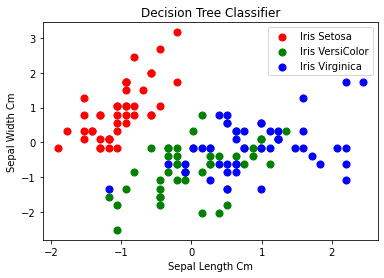

In [17]:
plt.scatter(x_train[y_pred_train == 0,0],x_train[y_pred_train == 0,1], s=50, color = 'red', label='Iris Setosa')
plt.scatter(x_train[y_pred_train == 1,0],x_train[y_pred_train == 1,1], s=50, color = 'green', label='Iris VersiColor')
plt.scatter(x_train[y_pred_train == 2,0],x_train[y_pred_train == 2,1], s=50, color = 'blue', label='Iris Virginica')
plt.title("Decision Tree Classifier")
plt.xlabel("Sepal Length Cm")
plt.ylabel("Sepal Width Cm")
plt.legend()
plt.show()

## Step 9: Get the predictions on the test set and visualize them

In [18]:
y_pred_test = classifier.predict(x_test)
print(y_pred_test)

[0 2 2 2 1 0 2 0 0 0 1 0 1 2 0]


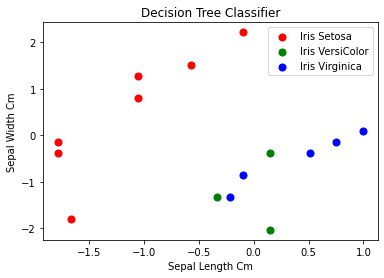

In [19]:
plt.scatter(x_test[y_pred_test == 0,0],x_test[y_pred_test == 0,1], s=50, color = 'red', label='Iris Setosa')
plt.scatter(x_test[y_pred_test == 1,0],x_test[y_pred_test == 1,1], s=50, color = 'green', label='Iris VersiColor')
plt.scatter(x_test[y_pred_test == 2,0],x_test[y_pred_test == 2,1], s=50, color = 'blue', label='Iris Virginica')
plt.title("Decision Tree Classifier")
plt.xlabel("Sepal Length Cm")
plt.ylabel("Sepal Width Cm")
plt.legend()
plt.show()

## Step 10: Evaluate the model

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test,y_pred_test)
ac = accuracy_score(y_test, y_pred_test)
print(f"Confusion Matrix :\n {cm}")
print(f"Accuracy : {ac*100}%")

Confusion Matrix :
 [[7 0 0]
 [0 2 0]
 [0 1 5]]
Accuracy : 93.33333333333333%
